In [1]:
import pandas as pd
train_dataset = pd.read_csv('corpus-raymond/train-full-hf-style.csv')
val_dataset = pd.read_csv('corpus-raymond/val-full-hf-style.csv')
test_dataset = pd.read_csv('corpus-raymond/test-full-hf-style-tokens.csv')
#take column 'tokens' as list
train_dataset['tokens'] = train_dataset['tokens'].apply(eval)
val_dataset['tokens'] = val_dataset['tokens'].apply(eval)
test_dataset['tokens'] = test_dataset['tokens'].apply(eval)

#take column 'IOB_tag' as list
train_dataset['IOB_tag'] = train_dataset['IOB_tag'].apply(eval)
val_dataset['IOB_tag'] = val_dataset['IOB_tag'].apply(eval)
test_dataset['IOB_tag'] = test_dataset['IOB_tag'].apply(eval)


In [2]:
!python --version

Python 3.11.11


In [3]:
iob_mapping = {
    "O": 0,
    "B-class": 1,
    "I-class": 2,
    "B-attr": 3,
    "I-attr": 4
}

label_names = [ 'O', 'B-class', 'I-class', 'B-attr', 'I-attr' ]

In [4]:
id2label = {i: label for i, label in enumerate(label_names)}
label2id = {v: k for k, v in id2label.items()}
id2label[5] = "[PAD]"
label2id["[PAD]"] = 5
print(id2label)
print(label2id)

{0: 'O', 1: 'B-class', 2: 'I-class', 3: 'B-attr', 4: 'I-attr', 5: '[PAD]'}
{'O': 0, 'B-class': 1, 'I-class': 2, 'B-attr': 3, 'I-attr': 4, '[PAD]': 5}


In [5]:
words = train_dataset.iloc[0]["tokens"]
labels = train_dataset.iloc[0]["IOB_tag"]
line1 = ""
line2 = ""
for word, label in zip(words, labels):
    full_label = label_names[label]
    max_length = max(len(word), len(full_label))
    line1 += word + " " * (max_length - len(word) + 1)
    line2 += full_label + " " * (max_length - len(full_label) + 1)

print(line1)
print(line2)

Customer . HTTPS with browser web button account customer new sdram MB 128 ; chip ram Flash ; GB : requirement hardware follow the to adhere 4 Intel XScale PXA270 a 
B-class  O O     O    O       O   O      I-class B-class  O   O     O  O   O O    O   O     O O  O O           O        O      O   O  O      O O     O      O      O 


In [6]:
from transformers import AutoTokenizer, DebertaV2TokenizerFast
import os
from pathlib import Path
tokenizer_checkpoint = "microsoft/deberta-v3-large"
model_checkpoint = "microsoft/deberta-v3-large" 
folder_name = "BERT-Style-result/microsoft/deberta-v3-large-4-epoch-8-bs-new"
model_name_save = "BERT-Style-model/microsoft/deberta-v3-large-4-epoch-8-bs-new"
Path(folder_name).mkdir(parents=True, exist_ok=True)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_checkpoint, add_prefix_space=True)

max_length = 256
epochs = 4
bs = 8

/usr/local/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [7]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = 5 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(5)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [8]:
inputs = tokenizer(train_dataset.iloc[0]["tokens"],truncation=True, is_split_into_words=True, padding='max_length', max_length=max_length)
labels = train_dataset.iloc[0]["IOB_tag"]
word_ids = inputs.word_ids()
print(inputs)
print("------------")
print(labels)
print("------------")
print(align_labels_with_tokens(labels, word_ids))

{'input_ids': [1, 5030, 323, 36145, 275, 2672, 967, 1946, 914, 1099, 353, 37455, 12288, 9354, 11600, 2600, 6288, 15359, 7144, 2600, 8817, 877, 4145, 3305, 1111, 262, 264, 11747, 453, 7450, 1477, 43571, 48995, 558, 22058, 266, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
def tokenize_and_align_labels(df):
    # Convert Pandas DataFrame to dictionary format (column-based)
    examples = df.to_dict(orient="list")

    # Tokenize the input tokens
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True, padding='max_length', max_length=max_length
    )

    all_labels = examples["IOB_tag"]
    rearranged_labels = []

    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        rearranged_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = rearranged_labels
    return tokenized_inputs


In [10]:
tokenized_train = tokenize_and_align_labels(train_dataset)
tokenized_val = tokenize_and_align_labels(val_dataset)
tokenized_test = tokenize_and_align_labels(test_dataset)

In [11]:
from datasets import Dataset
# convert tokenized train to arrow dataset class
train_dataset = Dataset.from_dict(tokenized_train)
val_dataset = Dataset.from_dict(tokenized_val)
test_dataset = Dataset.from_dict(tokenized_test)

# Data Collation

In [12]:
# from transformers import DataCollatorForTokenClassification

# data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# Metrics

In [13]:
import evaluate

metric = evaluate.load("seqeval")

In [14]:
import numpy as np


def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

# Defining the model

In [15]:
from torch.optim import AdamW
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    id2label=id2label,
    label2id=label2id,
    num_labels=len(id2label),
)
# weight_decay is a regularization procedure with regard to the weight matrices
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

# Adam optimizer
optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

Some weights of DebertaV2ForTokenClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# device = "cuda"
print(device)
model.to(device)

cuda


DebertaV2ForTokenClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 1024, padding_idx=0)
      (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-23): 24 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (key_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (value_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm)

# Preparing Fine Tuning

In [17]:
# Convert the dataset to torch tensors
train_inputs = torch.tensor(train_dataset["input_ids"])
dev_inputs = torch.tensor(val_dataset["input_ids"])
test_inputs = torch.tensor(test_dataset["input_ids"])
train_tags = torch.tensor(train_dataset["labels"])
dev_tags = torch.tensor(val_dataset["labels"])
test_tags = torch.tensor(test_dataset["labels"])
train_masks = torch.tensor(train_dataset["attention_mask"])
dev_masks = torch.tensor(val_dataset["attention_mask"])
test_masks = torch.tensor(test_dataset["attention_mask"])

In [18]:
from torch.utils.data import TensorDataset, RandomSampler, DataLoader, SequentialSampler

# We define the dataloaders. 
# Shuffle the data for training using RandomSampler
train_data = TensorDataset(train_inputs, train_masks, train_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

# Load dev and test data sequentially with SequentialSampler.
dev_data = TensorDataset(dev_inputs, dev_masks, dev_tags)
dev_sampler = SequentialSampler(dev_data)
dev_dataloader = DataLoader(dev_data, sampler=dev_sampler, batch_size=bs)

test_data = TensorDataset(test_inputs, test_masks, test_tags)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=bs)

In [19]:
# Import a scheduler to reduce the learning rate 
from transformers import get_linear_schedule_with_warmup

# Number of training epochs; the BERT paper uses 10
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training

In [20]:
from sklearn.metrics import f1_score
from tqdm import trange

# To measure execution time of this cell

# Train the model for; the BERT paper uses 4
## Store the average loss after each epoch; these values are used to plot the loss.
loss_values, development_loss_values = [], []


for _ in trange(epochs, desc="Epoch"):
    #
    # Training
    #
    # Set the model into training mode
    model.train()
    # Reset the total loss for each epoch
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        # Transfer batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Remove previous gradients before each backward pass
        model.zero_grad()
        # forward pass
        # This returns the loss (not the model output) since we have input the labels.
        outputs = model(b_input_ids,
                        attention_mask=b_input_mask, labels=b_labels)
        # Get the loss
        loss = outputs[0]
        # Backward pass to compute the gradients
        loss.backward()
        # Train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # Update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))
    

    # Store each loss value for plotting the learning curve afterwards
    loss_values.append(avg_train_loss)

    # After each training epoch, measure performance on development set

    # Set the model into evaluation mode
    model.eval()
    # Reset the development loss for this epoch
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in dev_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # The model must not compute or save gradients, in order to save memory and speed up this step
        with torch.no_grad():
            # Forward pass, compute predictions
            # This will return the logits (logarithm of the odds), not the loss (we do not provide labels)
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        # Transfer logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Compute the accuracy for this batch of development sentences
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)
        
        #data_seqeval["batch"].append(str(batch))
        #data_seqeval["true_tags"].append(str(label_ids))
        #data_seqeval["predicted_tags"].append(str([list(p) for p in np.argmax(logits, axis=2)]))

    #df_seqeval = pd.DataFrame(data_seqeval)
    #wandb.log({f"dataframe_seqeval": wandb.Table(dataframe=df_seqeval)})
    
    eval_loss = eval_loss / len(dev_dataloader)
    development_loss_values.append(eval_loss)
    print("Development loss: {}".format(eval_loss))
    pred_tags = [id2label[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if id2label[l_i] != "[PAD]"]
    dev_tags = [id2label[l_i] for l in true_labels
                                  for l_i in l if id2label[l_i] != "[PAD]"]
    f1 = f1_score(pred_tags, dev_tags, average='micro')

    # Format output with 4 decimal places
    output_text = "train-val F1 score: {:.4f}\n".format(f1)

    # Print to console
    print(output_text)

    # Save to a text file
    with open(folder_name + "/f1_score.txt", "a") as file:
        file.write(output_text)
    #print("Development classification report:\n{}".format(classification_report(pred_tags, dev_tags,digits=4)))
    print()
    

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Average train loss: 0.0651428721314908


Epoch:  25%|██▌       | 1/4 [05:57<17:53, 357.86s/it]

Development loss: 0.03264982157813038
train-val F1 score: 0.8919


Average train loss: 0.02983411466345925


Epoch:  50%|█████     | 2/4 [11:55<11:55, 357.76s/it]

Development loss: 0.031046055561184126
train-val F1 score: 0.8982


Average train loss: 0.017158247034208183


Epoch:  75%|███████▌  | 3/4 [17:56<05:59, 359.40s/it]

Development loss: 0.030641479642619773
train-val F1 score: 0.9078


Average train loss: 0.010996601482713935


Epoch: 100%|██████████| 4/4 [24:04<00:00, 361.02s/it]

Development loss: 0.033097463214012274
train-val F1 score: 0.9072




In [21]:
df = pd.DataFrame(list(zip(pred_tags, dev_tags)),
               columns =['Pred', 'True'])
df.to_csv(folder_name + '/train-val-result-bert.csv')

# Visualize

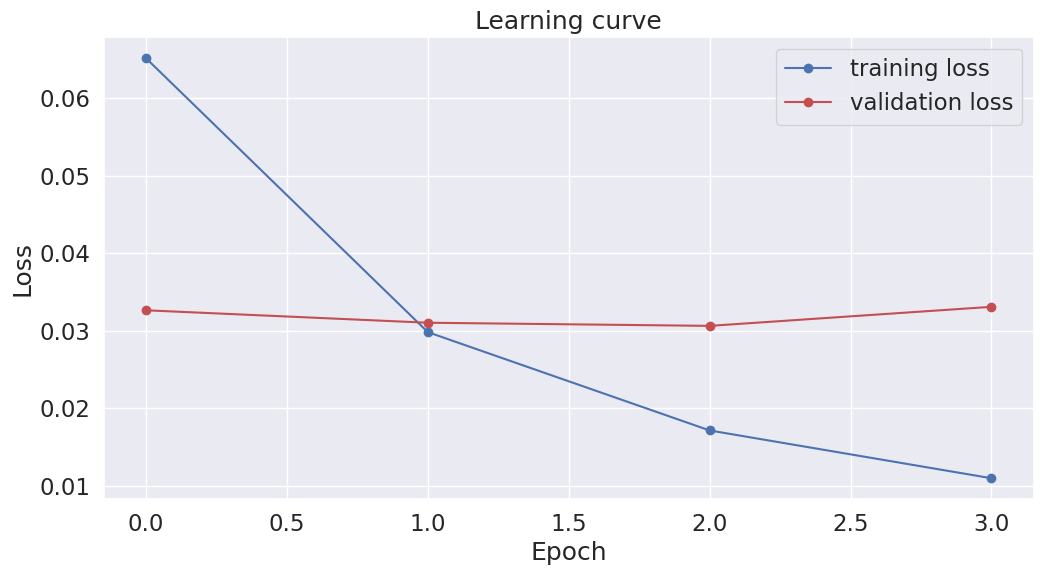

In [22]:
# Plot the training loss
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(development_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Testing  

In [23]:
# Apply the model to the test set
# Set again the model into evaluation mode
model.eval()
nb_eval_steps, nb_eval_examples = 0, 0
predictions , true_labels = [], []

input_ids_list = []

for batch in test_dataloader:

    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    # The model must not compute or store gradients
    with torch.no_grad():
        # Forward pass, calculate predictions.
        outputs = model(b_input_ids,
                            attention_mask=b_input_mask, labels=b_labels)
    # Transfer logits and labels to CPU
    logits = outputs[1].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    input_ids_list.extend(b_input_ids)
    
    # Calculate the accuracy for this batch of test sentences
    eval_loss += outputs[0].mean().item()
    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    true_labels.extend(label_ids)

pred_tags = [id2label[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if id2label[l_i] != "[PAD]"]
test_tags = [id2label[l_i] for l in true_labels
                                  for l_i in l if id2label[l_i] != "[PAD]"]
#print(str(pred_tags))
#print(str(test_tags))
f1 = f1_score(pred_tags, test_tags, average='micro')

# Format output with 4 decimal places
output_text = "Test F1 score: {:.4f}\n".format(f1)

# Print to console
print(output_text)

# Save to a text file
with open(folder_name + "/f1_score.txt", "a") as file:
    file.write(output_text)
#print("Test classification report: {}".format(classification_report(pred_tags, test_tags,digits=4)))

print()

Test F1 score: 0.8865




In [24]:
df = pd.DataFrame(list(zip(pred_tags, test_tags)),
               columns =['Pred', 'True'])
df.to_csv(folder_name + '/test-result-bert.csv')

In [25]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Load the CSV file
df = pd.read_csv(folder_name+"/test-result-bert.csv")

# Extract true and predicted labels
y_true = df["True"]
y_pred = df["Pred"]

# Define the target classes
target_classes = ["B-class", "I-class", "B-attr", "I-attr", "O"]

# Compute precision, recall, and F1-score for the specified classes
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=target_classes, zero_division=0)

# Compute overall accuracy
accuracy = accuracy_score(y_true, y_pred)

# Create a results dictionary
metrics = pd.DataFrame({
    "Class": target_classes,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Add overall accuracy
metrics.loc[len(metrics)] = ["Overall Accuracy", accuracy, accuracy, accuracy]

# Save metrics to a text file
with open(folder_name + "/f1_score.txt", "a") as file:
    file.write(metrics.to_string(index=False) + "\n")

# Display results
print(metrics)


              Class  Precision    Recall  F1-Score
0           B-class   0.650206  0.734884  0.689956
1           I-class   0.635294  0.568421  0.600000
2            B-attr   0.723077  0.671429  0.696296
3            I-attr   0.853933  0.535211  0.658009
4                 O   0.933333  0.951642  0.942399
5  Overall Accuracy   0.886494  0.886494  0.886494


# Saving

In [26]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
deberta.embeddings.word_embeddings.weight 	 torch.Size([128100, 1024])
deberta.embeddings.LayerNorm.weight 	 torch.Size([1024])
deberta.embeddings.LayerNorm.bias 	 torch.Size([1024])
deberta.encoder.layer.0.attention.self.query_proj.weight 	 torch.Size([1024, 1024])
deberta.encoder.layer.0.attention.self.query_proj.bias 	 torch.Size([1024])
deberta.encoder.layer.0.attention.self.key_proj.weight 	 torch.Size([1024, 1024])
deberta.encoder.layer.0.attention.self.key_proj.bias 	 torch.Size([1024])
deberta.encoder.layer.0.attention.self.value_proj.weight 	 torch.Size([1024, 1024])
deberta.encoder.layer.0.attention.self.value_proj.bias 	 torch.Size([1024])
deberta.encoder.layer.0.attention.output.dense.weight 	 torch.Size([1024, 1024])
deberta.encoder.layer.0.attention.output.dense.bias 	 torch.Size([1024])
deberta.encoder.layer.0.attention.output.LayerNorm.weight 	 torch.Size([1024])
deberta.encoder.layer.0.attention.output.LayerNorm.bias 	 torch.Size([1024])
deberta.enc

In [27]:
model.save_pretrained(model_name_save)
tokenizer.save_pretrained(model_name_save)

('BERT-Style-model/microsoft/deberta-v3-large-4-epoch-8-bs-new/tokenizer_config.json',
 'BERT-Style-model/microsoft/deberta-v3-large-4-epoch-8-bs-new/special_tokens_map.json',
 'BERT-Style-model/microsoft/deberta-v3-large-4-epoch-8-bs-new/spm.model',
 'BERT-Style-model/microsoft/deberta-v3-large-4-epoch-8-bs-new/added_tokens.json',
 'BERT-Style-model/microsoft/deberta-v3-large-4-epoch-8-bs-new/tokenizer.json')

In [28]:
from seqeval.metrics import classification_report, f1_score
from seqeval.scheme import IOB2  # or another scheme depending on your dataset

# Set model to evaluation mode
model.eval()
nb_eval_steps, nb_eval_examples = 0, 0
predictions, true_labels = [], []

input_ids_list = []
eval_loss = 0  # Make sure this is initialized

for batch in test_dataloader:

    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

    logits = outputs[1].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    input_ids_list.extend(b_input_ids)

    eval_loss += outputs[0].mean().item()

    # Convert predictions and labels to label strings
    batch_preds = np.argmax(logits, axis=2)
    
    for pred_seq, label_seq in zip(batch_preds, label_ids):
        pred_tags_seq = []
        true_tags_seq = []
        for p_i, l_i in zip(pred_seq, label_seq):
            if id2label[l_i] != "[PAD]":
                pred_tags_seq.append(id2label[p_i])
                true_tags_seq.append(id2label[l_i])
        predictions.append(pred_tags_seq)
        true_labels.append(true_tags_seq)

# Compute F1 score using seqeval
f1 = f1_score(true_labels, predictions)
output_text = "Test F1 score (seqeval): {:.4f}\n".format(f1)

print(output_text)

# Save to a text file
with open(folder_name + "/f1_score.txt", "a") as file:
    file.write(output_text)

# Print full classification report
print("Seqeval classification report:")
print(classification_report(true_labels, predictions, digits=4))


Test F1 score (seqeval): 0.6166

Seqeval classification report:
              precision    recall  f1-score   support

        PAD]     0.0000    0.0000    0.0000         0
        attr     0.5882    0.5674    0.5776       141
       class     0.5952    0.6977    0.6424       215

   micro avg     0.5897    0.6461    0.6166       356
   macro avg     0.3945    0.4217    0.4067       356
weighted avg     0.5925    0.6461    0.6167       356



/usr/local/lib/python3.11/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: [PAD] seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
df = pd.DataFrame(list(zip(predictions, true_labels)),
               columns =['Pred', 'True'])
df.to_csv(folder_name + '/test-result-bert-seqeval.csv')